# (Prosper Loan Data)
## by (Mohamed Hekal)

## Investigation Overview

> In this investigation, I wanted to look at the factors that affect the loan status 
## Dataset Overview

> This data about Prosper Marketplace, Inc. is a San Francisco, California-based company in the peer-to-peer lending industry. Prosper Funding LLC, one of its subsidiaries, operates Prosper.com, a website where individuals can either invest in personal loans or request to borrow money. The data contain 113937 raw and 81 columns.

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [8]:
# The cols name that i work on it 
cols = ['Term','LoanStatus','ListingCategory (numeric)','EmploymentStatus','IsBorrowerHomeowner',
        'CreditScoreRangeLower','CreditScoreRangeUpper','StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment']

# filter the data on that cols and save it in a new dataframe colled new_df
new_df = df[cols]
new_df['EmploymentStatus'].fillna("Not available",inplace=True)
new_df.dropna(subset = ["CreditScoreRangeLower"], inplace=True)

In [9]:
# little fun to cluster score
def Credit_score(x):
    outcome=""
    if x >= 300 :
        outcome = "Poor"
    if x>=550:
        outcome = "Fair"
    if x>=650:
        outcome = "Good"
    if x>=750:
        outcome = "Excellent"
    return outcome

new_df['CreditScore'] = new_df['CreditScoreRangeLower'].apply(Credit_score)
# Drop the redundant columns
cols = ['CreditScoreRangeLower','CreditScoreRangeUpper']
new_df.drop(columns=cols , axis=1 , inplace=True)
## make Credit Score order 
order = ['Poor','Fair','Good','Excellent']
order_class = pd.api.types.CategoricalDtype(ordered=True ,categories= order)
new_df['CreditScore'] = new_df['CreditScore'].astype(order_class)

In [10]:
def H_M_Yers(x):
    return x/12

new_df['Term'] = new_df['Term'].apply(H_M_Yers).astype(int)
# change the listing from numbers to corresponding categorie
listing_Cat = {0:"Not Available",
               1:"Debt Consolidation",
               2:"Home Improvement",
               3:"Business",
               4:"Personal Loan",
               5:"Student Use",
               6:"Auto",
               7:"Other",
               8:"Baby&Adoption",
               9:"Boat",
               10:"Cosmetic Procedure",
               11:"Engagement Ring",
               12:"Green Loans",
               13:"Household Expenses",
               14:"Large Purchases",
               15:"Medical/Dental",
               16:"Motorcycle",
               17:"RV",
               18:"Taxes",
               19:"Vacation",
               20:"Wedding Loans",}
def Lst_Cat(x,y=listing_Cat):
    return y[x]
new_df.rename(columns={'ListingCategory (numeric)': 'ListingCategory'},inplace=True)
new_df['ListingCategory'] = new_df['ListingCategory'].apply(Lst_Cat)


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Distribution of Loan Original Amount)

> Loan amount from the data set take a range from about the lowest 1k to the highest 35k. There are a much big spikes in different amount like 4k, 5K,10k and 15k. Almost few ask for fractions and a lot ask for multiples of five

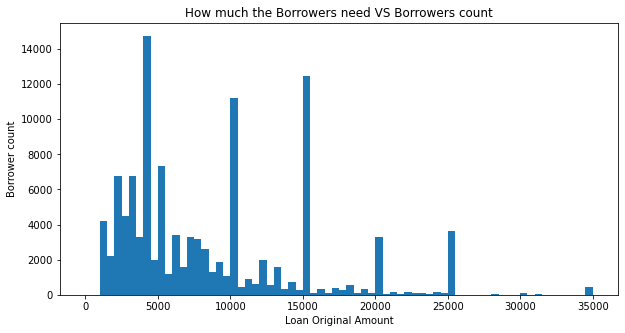

In [21]:
x_bins = np.arange(0,new_df.LoanOriginalAmount.max()+500,500)
plt.figure(figsize=[10,5])
plt.hist(x=new_df.LoanOriginalAmount,bins=x_bins);
plt.xlabel("Loan Original Amount")
plt.ylabel("Borrower count")
plt.title("How much the Borrowers need VS Borrowers count");

## (Distribution of Monthly Loan Payment)

> Monthly Loan Payment has a long-tailed distribution,a lot of borrowers pay little and few pay much.When plotted in logarithmic scale the distribution is a multimodal and have a big spike between 150 to 200 and one before 400

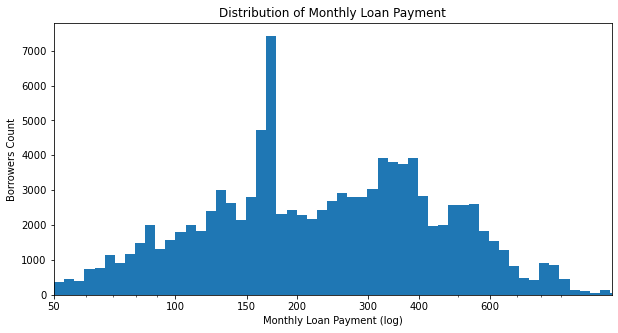

In [35]:
x_bins = 10**np.arange(0,np.log10(new_df.MonthlyLoanPayment.max())+0.025,0.025)
plt.figure(figsize=[10,5])
plt.hist(x=new_df.MonthlyLoanPayment,bins=x_bins);
plt.xscale('log')
plt.xticks([50, 100, 150, 200, 300, 400,600], ['50', '100', '150', '200', '300', '400','600'])
plt.xlim([50,1200])
plt.xlabel("Monthly Loan Payment (log)");
plt.title("Distribution of Monthly Loan Payment")
plt.ylabel('Borrowers Count');

In [36]:
index = new_df[new_df['StatedMonthlyIncome']==0].index
new_df.drop(index,inplace=True)

index = new_df[new_df['StatedMonthlyIncome']>=12500].index
new_df.drop(index,inplace=True)

## (Term by Stated MonthlyIncome & MonthlyLoanPayment & LoanOriginalAmount)
It is not high interaction between term and monthly income, in normal higher in term lower in loan monthly payment but the plot shows that borrowers that loan for 5 years pay much every month and this because that these borrowers make a high Loan amount and it makes sense.



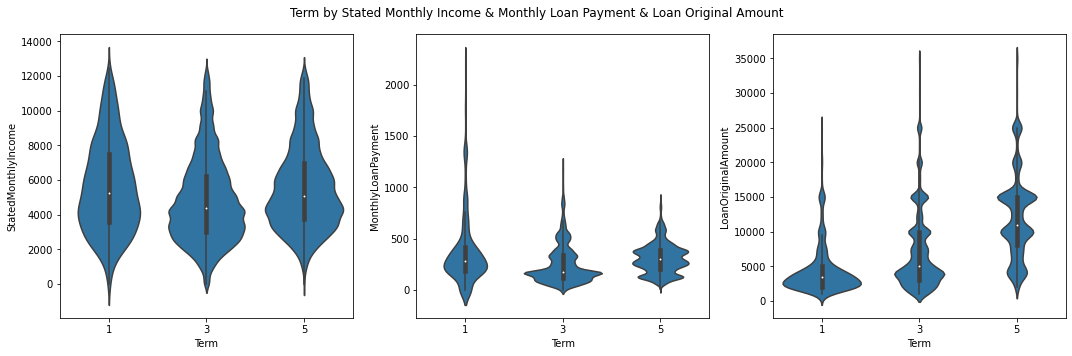

In [40]:
default_color = sb.color_palette()[0]
cat_var = ['Term']
fig , ax = plt.subplots(ncols=3,figsize =[15,5])
for i in range(len(cat_var)):
    var = cat_var[i]
    sb.violinplot(data=new_df,x=var , y='StatedMonthlyIncome',color=default_color, ax=ax[0])
    sb.violinplot(data=new_df,x=var , y='MonthlyLoanPayment' ,color=default_color, ax=ax[1])
    sb.violinplot(data=new_df,x=var , y='LoanOriginalAmount' ,color=default_color, ax=ax[2])
    plt.suptitle("Term by Stated Monthly Income & Monthly Loan Payment & Loan Original Amount")
plt.tight_layout()

## (Loan Status By Term & Monthly Income & Monthly Loan Payment & Loan Original Amount )
It is clear that the lower the monthly income, the longer the repayment delay. In all cases, the larger the monthly loan payment of loans when the loan is for one year. When the loan is of high amount, the monthly payment of the loan is large and the monthly income is low, The delay in repayment often occurs. Most borrowers who need a loan of high amount make it for 5 Years

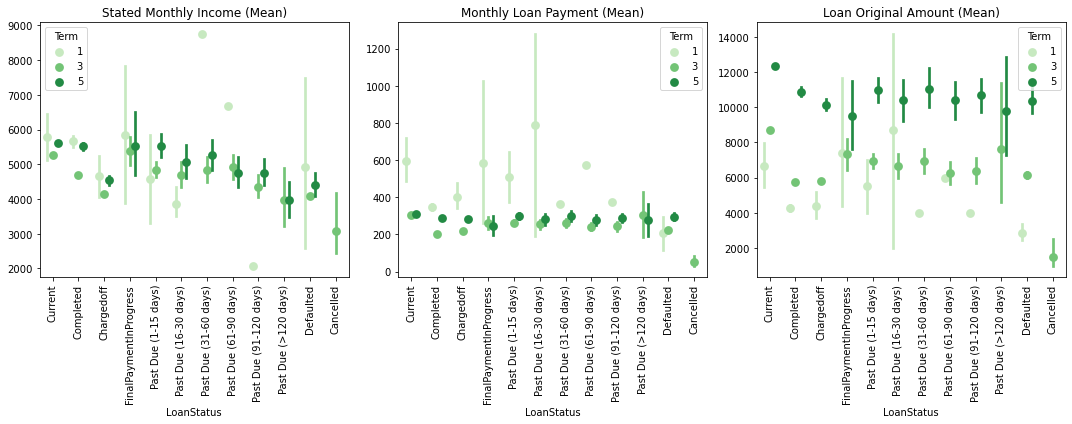

In [45]:
ordr = ['Current','Completed','Chargedoff','FinalPaymentInProgress','Past Due (1-15 days)','Past Due (16-30 days)'
        ,'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Defaulted','Cancelled']
fig, ax = plt.subplots(ncols = 3, figsize = [15,6])

sb.pointplot(data = new_df, x = 'LoanStatus', y = 'StatedMonthlyIncome', hue = 'Term',order=ordr,
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[0])
ax[0].set_title('Stated Monthly Income (Mean)')
ax[0].set_ylabel('')
ax[0].set_yticklabels([],minor = True)
ax[0].set_xticklabels(ordr,rotation = 90)

sb.pointplot(data = new_df, x = 'LoanStatus', y = 'MonthlyLoanPayment', hue = 'Term',order=ordr,
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[1])
ax[1].set_title('Monthly Loan Payment (Mean)')
ax[1].set_ylabel('')
ax[1].set_yticklabels([],minor = True)
ax[1].set_xticklabels(ordr,rotation = 90)
sb.pointplot(data = new_df, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'Term',order=ordr,
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[2])
ax[2].set_title('Loan Original Amount (Mean)')
ax[2].set_ylabel('')
ax[2].set_yticklabels([],minor = True)
ax[2].set_xticklabels(ordr,rotation = 90)

plt.tight_layout()
plt.show();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [50]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --no-input

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 738661 bytes to slide_deck_template.slides.html
